In [1]:
import pandas as pd

## load reviews dataset 
reviews = pd.read_csv(r'/Users/nikkigerjarusak/desktop/ThesisPython/reviews.csv')
reviews.head(5)

,_id,business_id,review_id,stars,text,user_id
0,623b3ab4258609f2a4f766ea,XQfwVwDr-v0ZS3_CbbE5Xw,KU_O5udG6zpxOg-VcAEodg,3,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA
1,623b3ab4258609f2a4f766eb,7ATYjTIgM3jUlt4UM3IypQ,BiTunyQ73aT9WBnpR9DZGw,5,I've taken a lot of spin classes over the year...,OyoGAe7OKpv6SyGZT5g77Q
2,623b3ab4258609f2a4f766ec,YjUWPpI6HXG530lwP-fb2A,saUsX_uimxRlCVr67Z4Jig,3,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A
3,623b3ab4258609f2a4f766ed,kxX2SOes4o-D3ZQBkiMRfA,AqPFMleE6RsU23_auESxiA,5,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ
4,623b3ab4258609f2a4f766ee,e4Vwtrqf-wpJfwesgvdgxQ,Sx8TMOWLNuJBWer-0pcmoA,4,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ


In [2]:
## getting just text and star ratings
text_stars = reviews[["text", "stars"]]

In [3]:
text_stars.head(5)

,text,stars
0,"If you decide to eat here, just be aware it is...",3
1,I've taken a lot of spin classes over the year...,5
2,Family diner. Had the buffet. Eclectic assortm...,3
3,"Wow! Yummy, different, delicious. Our favo...",5
4,Cute interior and owner (?) gave us tour of up...,4


In [152]:
print(reviews.loc[[0]])

                        _id             business_id               review_id  \
0  623b3ab4258609f2a4f766ea  XQfwVwDr-v0ZS3_CbbE5Xw  KU_O5udG6zpxOg-VcAEodg   

   stars                                               text  \
0      3  If you decide to eat here, just be aware it is...   

                  user_id  
0  mh_-eMZ6K5RLWhZyISBhwA  


In [4]:
text_stars.count()

text     6990280
stars    6990280
dtype: int64

In [142]:
text_stars.describe()

,stars
count,6.990280e+06
mean,3.748584e+00
std,1.478705e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


there are 6,990,280 reviews included in that dataset

mean star rating = 3.75 (pretty high)
std = 1.48
min = 1.00
max = 5.00 
25% quartile = 3.00
50% quartile = 4.00
75% quartile = 5.00 

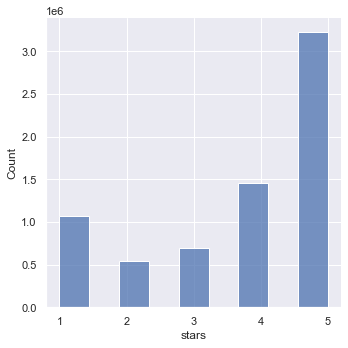

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(text_stars, x = "stars", bins = 9)

Star ratings here are integers, meaning that they rounded up the half star ratings, which explains why the mean is high. We can see that there are mostly 5.0 star reviews (or 4.5 stars rounded up). Since the mode is so high, I assume that more people are inclined to give good reviews in this dataset. 

In [5]:
data = text_stars.drop(range(20001, 6990280))

In [2]:
sample_data = reviews.drop(range(300, 6990280))

In [3]:
sample_data.count()

_id            300
business_id    300
review_id      300
stars          300
text           300
user_id        300
dtype: int64

In [11]:
import os
os.getcwd()

'/Users/nikkigerjarusak/Desktop/ThesisPython'

In [10]:
sample_data.to_csv(r'/')

IsADirectoryError: [Errno 21] Is a directory: '/Users/nikkigerjarusak/desktop/'

In [6]:
data.count()

text     20001
stars    20001
dtype: int64

In [34]:
data['stars'].value_counts()

5    8901
4    5131
3    2241
1    2157
2    1571
Name: stars, dtype: int64

In [7]:
data.describe()

,stars
count,20001.000000
mean,3.852357
std,1.349130
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


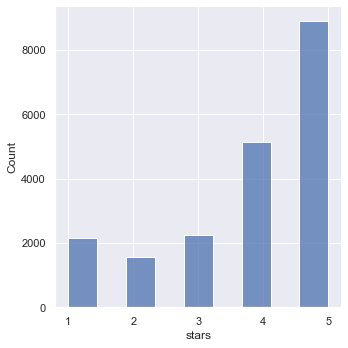

In [143]:
##plot the histogram to see the distribution of stars
sns.displot(data, x = "stars", bins = 9)

In [9]:
## create function to label star ratings
def rating(r):
    if r == 1:
        return "bad"
    elif r == 2:
        return "bad"
    elif r == 3:
        return "neutral"
    elif r == 4:
        return "good"
    else:
        return "good"

In [10]:
## apply function
data['rating'] = data['stars'].apply(rating)

In [11]:
data.head(15)

,text,stars,rating
0,"If you decide to eat here, just be aware it is...",3,neutral
1,I've taken a lot of spin classes over the year...,5,good
2,Family diner. Had the buffet. Eclectic assortm...,3,neutral
3,"Wow! Yummy, different, delicious. Our favo...",5,good
4,Cute interior and owner (?) gave us tour of up...,4,good
5,I am a long term frequent customer of this est...,1,bad
6,Loved this tour! I grabbed a groupon and the p...,5,good
7,Amazingly amazing wings and homemade bleu chee...,5,good
8,This easter instead of going to Lopez Lake we ...,3,neutral
9,Had a party of 6 here for hibachi. Our waitres...,3,neutral


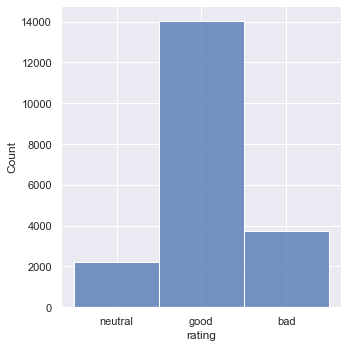

In [144]:
## distribution of ratings
sns.displot(data, x = "rating")

In [13]:
businesses = pd.read_csv(r'/Users/nikkigerjarusak/desktop/ThesisPython/businesses.csv')
businesses.head(5)

,_id,address,attributes,attributes.AcceptsInsurance,attributes.Alcohol,attributes.Ambience,attributes.BestNights,attributes.BikeParking,attributes.BusinessAcceptsBitcoin,attributes.BusinessAcceptsCreditCards,...,hours.Sunday,hours.Thursday,hours.Tuesday,hours.Wednesday,is_open,name,postal_code,review_count,stars,state
0,623b659d8a3fd8be2fa1c3e9,"1616 Chapala St, Ste 2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,623b659d8a3fd8be2fa1c3ea,87 Grasso Plaza Shopping Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,8:0-18:30,8:0-18:30,8:0-18:30,1,The UPS Store,63123,15,3.0,MO
2,623b659d8a3fd8be2fa1c3eb,5255 E Broadway Blvd,NaN,NaN,NaN,NaN,NaN,True,NaN,True,...,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,0,Target,85711,22,3.5,AZ
3,623b659d8a3fd8be2fa1c3ec,935 Race St,NaN,NaN,u'none',NaN,NaN,True,NaN,False,...,7:0-21:0,7:0-20:0,7:0-20:0,7:0-20:0,1,St Honore Pastries,19107,80,4.0,PA
4,623b659d8a3fd8be2fa1c3ed,101 Walnut St,NaN,NaN,NaN,NaN,NaN,True,NaN,True,...,12:0-18:0,16:0-22:0,NaN,14:0-22:0,1,Perkiomen Valley Brewery,18054,13,4.5,PA


In [157]:
business_id = businesses["business_id"]

In [158]:
business_id.head()

0    Pns2l4eNsfO8kk83dixA6A
1    mpf3x-BjTdTEA3yCZrAYPw
2    tUFrWirKiKi_TAnsVWINQQ
3    MTSW4McQd7CbVtyjqoe9mw
4    mWMc6_wTdE0EUBKIGXDVfA
Name: business_id, dtype: object

In [14]:
businesses.describe()

,attributes,hours,is_open,review_count,stars
count,0.0,0.0,150346.00000,150346.000000,150346.000000
mean,NaN,NaN,0.79615,44.866561,3.596724
std,NaN,NaN,0.40286,121.120136,0.974421
min,NaN,NaN,0.00000,5.000000,1.000000
25%,NaN,NaN,1.00000,8.000000,3.000000
50%,NaN,NaN,1.00000,15.000000,3.500000
75%,NaN,NaN,1.00000,37.000000,4.500000
max,NaN,NaN,1.00000,7568.000000,5.000000


In [147]:
businesses['state'].value_counts()

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
MA         2
HI         2
WA         2
UT         1
NC         1
VT         1
MI         1
VI         1
SD         1
MT         1
XMS        1
Name: state, dtype: int64

<Figure size 1440x720 with 0 Axes>

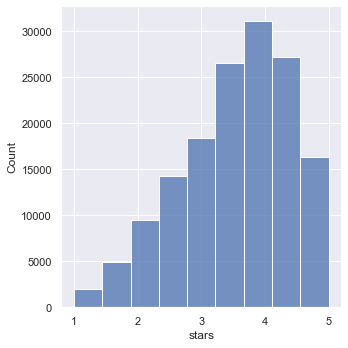

In [145]:
plt.figure(figsize=(20,10))
sns.displot(businesses, x = "stars", bins = 9)

From the businesses dataset, we can see that they include .5 star ratings. Here, more establishments received a 4.0 star rating. This is lower than the previous distribution from the reviews dataset because 4.5 stars aren't rounded up to 5.0 stars. This is also based on businesses and not on individidual reviews.

In [16]:
businesses['stars'].describe()

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

The mean star rating is lower at 3.597 because the star ratings are rounded up. The 75% quartile is also lower than 5.0 at 4.5 stars. 

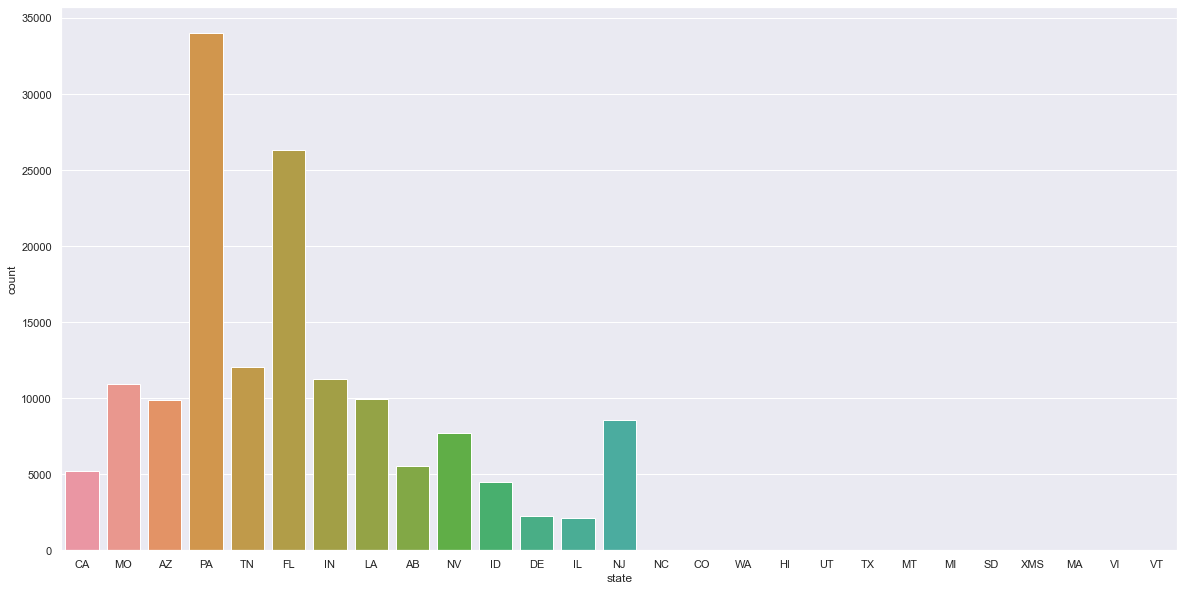

In [17]:
state_data = businesses.dropna(subset = ['state'])

sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x = 'state', data = state_data)

In [18]:
## load packages 
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

## sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [19]:
data['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in data['text']]

In [20]:
full_text = ' '.join(data['text'])

In [21]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

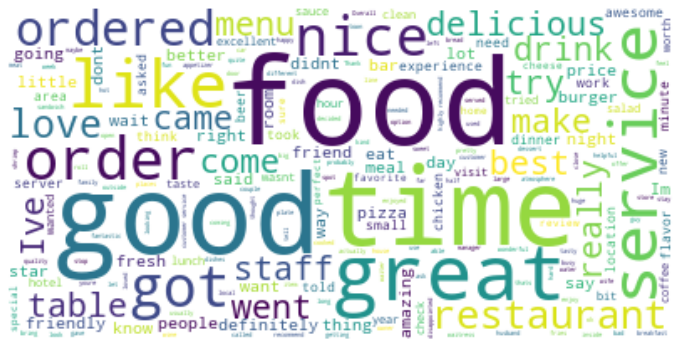

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)
plt.figure( figsize=(12,12))
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
        
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

In [24]:
print(token_dist.most_common(20))

[('food', 10766), ('good', 10179), ('great', 9550), ('service', 6434), ('like', 6289), ('time', 6071), ('really', 4773), ('nice', 3692), ('got', 3619), ('best', 3610), ('dont', 3323), ('staff', 3162), ('ordered', 3162), ('love', 3137), ('ive', 3124), ('order', 3044), ('delicious', 3036), ('im', 3028), ('friendly', 3027), ('restaurant', 2854)]


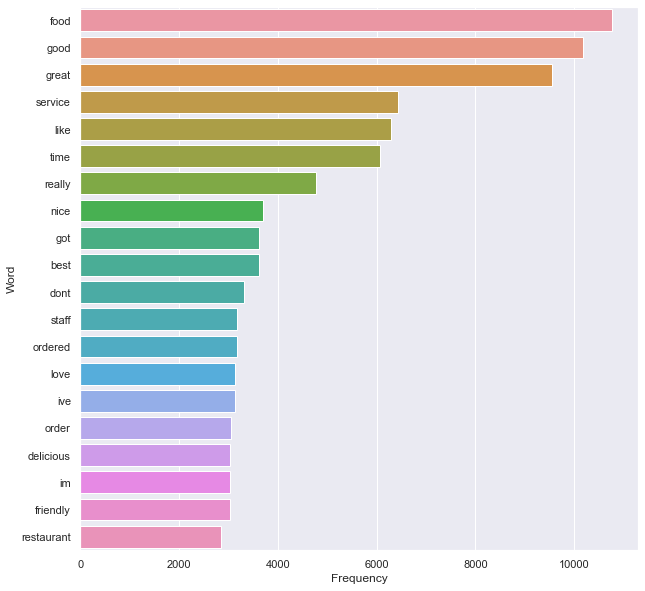

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x = dist.Frequency, y = dist.Word, ax=ax);

In [26]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

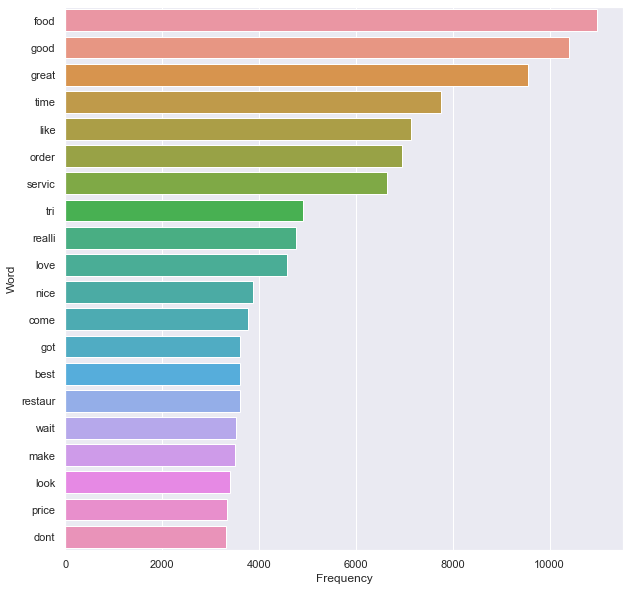

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x = stemmed_dist.Frequency, y = stemmed_dist.Word, ax=ax);

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))
bigrams = vect.fit_transform(data['text'])
bigram_df = pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

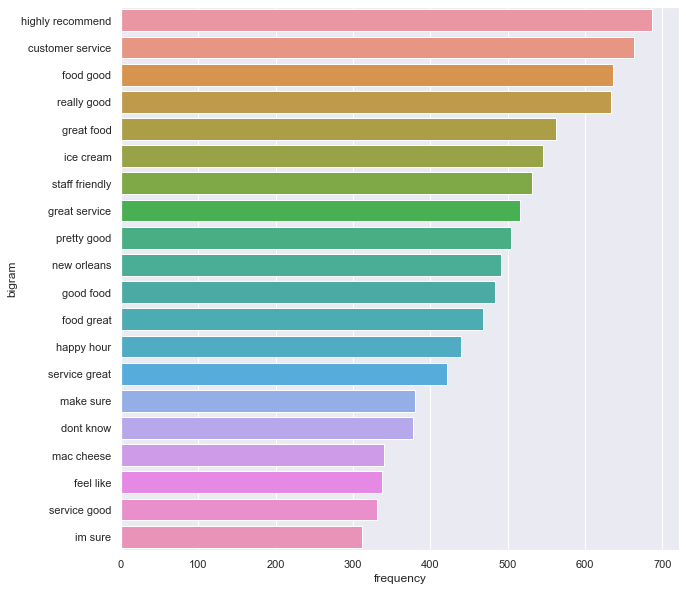

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x = bigram_frequency.frequency, y = bigram_frequency.bigram, ax=ax);

In [30]:
## good reviews are 4-5 stars 
data_good = data[data['rating'] == 'good']

In [32]:
data_good.head(5)

,text,stars,rating
1,Ive taken a lot of spin classes over the years...,5,good
3,"Wow! Yummy, different, delicious. Our favo...",5,good
4,Cute interior and owner (?) gave us tour of up...,4,good
6,Loved this tour! I grabbed a groupon and the p...,5,good
7,Amazingly amazing wings and homemade bleu chee...,5,good


In [33]:
data_good['stars'].value_counts()

5    8901
4    5131
Name: stars, dtype: int64

In [36]:
from nltk.tokenize import sent_tokenize

good_reviews = ' '.join(data_good.text)

## split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
## get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [37]:
print(sentences_good[50:55])

['I like the Veal Milanese but with mixed greens instead of pasta!', 'theyll modify the menu to suit your taste!', 'Good food--loved the gnocchi with marinara\nthe baked eggplant appetizer was very good too\n\nThe service was very slow, but despite this, Id go back, the food is just that good The bun makes the Sonoran Dog.', 'Its like a snuggie for the pup.', 'A first, it seems ridiculous and almost like its going to be too much, exactly like everyones favorite blanket with sleeves.']


In [38]:
print(good_token_clean[50:55])

[['like', 'veal', 'milanese', 'mixed', 'greens', 'instead', 'pasta'], ['theyll', 'modify', 'menu', 'suit', 'taste'], ['good', 'food--loved', 'gnocchi', 'marinara', 'baked', 'eggplant', 'appetizer', 'good', 'service', 'slow', 'despite', 'id', 'food', 'good', 'bun', 'makes', 'sonoran', 'dog'], ['like', 'snuggie', 'pup'], ['ridiculous', 'like', 'going', 'exactly', 'like', 'everyones', 'favorite', 'blanket', 'sleeves']]


In [39]:
from gensim.models import Word2Vec

model_ted = Word2Vec(sentences = good_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('excellent', 0.1701252),
 ('attentive', 0.076275),
 ('friendly', 0.061128594),
 ('customer', 0.044999354),
 ('prompt', 0.03310825),
 ('outstanding', 0.025483564),
 ('fantastic', 0.02325319),
 ('efficient', 0.02088812),
 ('quick', 0.017085822),
 ('pleasant', 0.016566245)]

In [40]:
model_ted = Word2Vec(sentences = good_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['food'], topn=10)

[('fast', 0.034968767),
 ('reasonable', 0.030071557),
 ('excellent', 0.0236679),
 ('delicious', 0.021323845),
 ('quality', 0.01976112),
 ('decent', 0.009081867),
 ('amazing', 0.007807845),
 ('priced', 0.007530482),
 ('fantastic', 0.0071881055),
 ('cheap', 0.007105498)]

In [41]:
model_ted = Word2Vec(sentences = good_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['clean'], topn=10)

[('clean', 0.29289111),
 ('modern', 0.044732347),
 ('comfortable', 0.02917764),
 ('welcoming', 0.02793666),
 ('rooms', 0.023923494),
 ('spacious', 0.023798611),
 ('decor', 0.018089175),
 ('inviting', 0.013672311),
 ('cozy', 0.013273399),
 ('comfy', 0.012719782)]

In [159]:
data_bad = data[data['rating'] == 'bad']

In [160]:
bad_reviews = ' '.join(data_bad.text)

## split the long string into sentences
sentences_bad = sent_tokenize(bad_reviews)
bad_token_clean = list()
## get tokens for each sentence
for sentence in sentences_bad:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    bad_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [161]:
from gensim.models import Word2Vec

model_ted = Word2Vec(sentences = bad_token_clean, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('customer', 0.113932244),
 ('service', 0.10290939),
 ('experience', 0.025602335),
 ('terrible', 0.019734338),
 ('worst', 0.019024272),
 ('horrible', 0.012204978),
 ('poor', 0.009223159),
 ('bad', 0.0092033325),
 ('ive', 0.0062656403),
 ('great', 0.0057819057)]

In [76]:
def clean_text(txt_in):
    x = re.sub("[^A-Za-z0-9]+"," ", txt_in).strip().lower()
    return x

In [77]:
data['clean_text'] = data['text'].apply(lambda x: clean_text(x))

In [79]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
data['sentiment_scores'] = data['clean_text'].apply(sid.polarity_scores)
data['sentiment'] = data['sentiment_scores'].apply(lambda x: x['compound'])

In [81]:
data.sample(5)

,text,stars,rating,sentiment_scores,sentiment,clean_text
7850,I have a hard time imagining a better breakfas...,5,good,"{'neg': 0.115, 'neu': 0.543, 'pos': 0.342, 'co...",0.8442,i have a hard time imagining a better breakfas...
10109,This is probably my newest favorite Thai place...,5,good,"{'neg': 0.014, 'neu': 0.872, 'pos': 0.114, 'co...",0.8934,this is probably my newest favorite thai place...
16467,Macs is my favorite bar in Old City thus far. ...,5,good,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.9864,macs is my favorite bar in old city thus far t...
4437,The gentleman in the truck was very nice so he...,5,good,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9181,the gentleman in the truck was very nice so he...
5979,Stopped in for dinner alone while taking a bre...,1,bad,"{'neg': 0.102, 'neu': 0.854, 'pos': 0.044, 'co...",-0.4201,stopped in for dinner alone while taking a bre...


In [82]:
## drop neutral rating, 3 stars
data_update = data.drop(data[data.stars == 3].index)

In [83]:
data_update.head(10)

,text,stars,rating,sentiment_scores,sentiment,clean_text
1,Ive taken a lot of spin classes over the years...,5,good,"{'neg': 0.05, 'neu': 0.708, 'pos': 0.242, 'com...",0.9855,ive taken a lot of spin classes over the years...
3,"Wow! Yummy, different, delicious. Our favo...",5,good,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.9509,wow yummy different delicious our favorite is ...
4,Cute interior and owner (?) gave us tour of up...,4,good,"{'neg': 0.017, 'neu': 0.716, 'pos': 0.267, 'co...",0.9798,cute interior and owner gave us tour of upcomi...
5,I am a long term frequent customer of this est...,1,bad,"{'neg': 0.133, 'neu': 0.672, 'pos': 0.195, 'co...",0.5859,i am a long term frequent customer of this est...
6,Loved this tour! I grabbed a groupon and the p...,5,good,"{'neg': 0.031, 'neu': 0.814, 'pos': 0.155, 'co...",0.9507,loved this tour i grabbed a groupon and the pr...
7,Amazingly amazing wings and homemade bleu chee...,5,good,"{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...",0.9678,amazingly amazing wings and homemade bleu chee...
10,My experience with Shalimar was nothing but wo...,5,good,"{'neg': 0.099, 'neu': 0.757, 'pos': 0.144, 'co...",0.9078,my experience with shalimar was nothing but wo...
11,"Locals recommended Milktooth, and its an amazi...",4,good,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",0.8442,locals recommended milktooth and its an amazin...
12,Love going here for happy hour or dinner! Gre...,4,good,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.8047,love going here for happy hour or dinner great...
13,Good food--loved the gnocchi with marinara\nth...,4,good,"{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.8481,good food loved the gnocchi with marinara the ...


In [84]:
## create function for good = 1 and bad = 0
def label(l):
    if l == 5:
        return 1
    elif l == 4:
        return 1
    elif l == 2:
        return 0
    else:
        return 0

In [85]:
## apply function
data_update['label'] = data_update['stars'].apply(label)

In [86]:
data_update.head(10)

,text,stars,rating,sentiment_scores,sentiment,clean_text,label
1,Ive taken a lot of spin classes over the years...,5,good,"{'neg': 0.05, 'neu': 0.708, 'pos': 0.242, 'com...",0.9855,ive taken a lot of spin classes over the years...,1
3,"Wow! Yummy, different, delicious. Our favo...",5,good,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.9509,wow yummy different delicious our favorite is ...,1
4,Cute interior and owner (?) gave us tour of up...,4,good,"{'neg': 0.017, 'neu': 0.716, 'pos': 0.267, 'co...",0.9798,cute interior and owner gave us tour of upcomi...,1
5,I am a long term frequent customer of this est...,1,bad,"{'neg': 0.133, 'neu': 0.672, 'pos': 0.195, 'co...",0.5859,i am a long term frequent customer of this est...,0
6,Loved this tour! I grabbed a groupon and the p...,5,good,"{'neg': 0.031, 'neu': 0.814, 'pos': 0.155, 'co...",0.9507,loved this tour i grabbed a groupon and the pr...,1
7,Amazingly amazing wings and homemade bleu chee...,5,good,"{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'comp...",0.9678,amazingly amazing wings and homemade bleu chee...,1
10,My experience with Shalimar was nothing but wo...,5,good,"{'neg': 0.099, 'neu': 0.757, 'pos': 0.144, 'co...",0.9078,my experience with shalimar was nothing but wo...,1
11,"Locals recommended Milktooth, and its an amazi...",4,good,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",0.8442,locals recommended milktooth and its an amazin...,1
12,Love going here for happy hour or dinner! Gre...,4,good,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.8047,love going here for happy hour or dinner great...,1
13,Good food--loved the gnocchi with marinara\nth...,4,good,"{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...",0.8481,good food loved the gnocchi with marinara the ...,1


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# vectorization
vect = CountVectorizer(max_features=300, stop_words=my_stop_words)
vect.fit(data_update.clean_text)
X = vect.transform(data_update.clean_text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

# Define the vector of targets and matrix of features
y = data_update.label
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [88]:
X_train.shape

(14208, 300)

In [89]:
## logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)

y_pred_lg = log_reg.predict(X_test)

# find the most informative words
log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [90]:
print(coeff)

               coef
perfectly  2.389181
amazing    2.182525
excellent  2.085300
delicious  2.084201
awesome    1.925646
...             ...
tasted    -1.139118
ok        -1.155303
cold      -1.193473
money     -1.343858
wont      -1.500470

[300 rows x 1 columns]


In [91]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lg))

Accuracy: 0.8975225225225225


In [92]:
## naive bayes
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

In [93]:
print(nb_pred)

[1 1 1 ... 0 1 0]


In [94]:
print("Accuracy:", metrics.accuracy_score(y_test, nb_pred))

Accuracy: 0.8800675675675675


In [95]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()


# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
models['Naive Bayes'] = MultinomialNB()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest Classifier'] = RandomForestClassifier()

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [97]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.897523,0.952245,0.920744
Support Vector Machines,0.895833,0.952245,0.918845
Naive Bayes,0.880068,0.937634,0.912908
Random Forest Classifier,0.881757,0.956165,0.900336


In [169]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report 

tfidf = TfidfVectorizer(max_features = 20000, ngram_range = (1,3), analyzer ='char')

X = tfidf.fit_transform(data['clean_text'])
y = data['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [138]:
star_clf = LinearSVC()
star_clf.fit(X_train, y_train)

LinearSVC()

In [139]:
star_clf_pred = star_clf.predict(X_test)

In [140]:
print(classification_report(y_test, star_clf_pred))

              precision    recall  f1-score   support

           1       0.64      0.74      0.69       432
           2       0.43      0.19      0.26       314
           3       0.44      0.21      0.28       448
           4       0.47      0.43      0.45      1026
           5       0.69      0.86      0.76      1781

    accuracy                           0.61      4001
   macro avg       0.53      0.49      0.49      4001
weighted avg       0.58      0.61      0.58      4001



In [170]:
from sklearn.linear_model import LinearRegression

X = data['sentiment']
y = data['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [129]:
X_train

19848    0.6908
15072    0.9524
3764     0.7159
15440    0.8969
19697    0.9501
          ...  
8222     0.9106
9449     0.9348
8471     0.9694
17048    0.9978
1318     0.8860
Name: sentiment, Length: 16000, dtype: float64

In [130]:
lr = LinearRegression()

X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

lr.fit(X_train, y_train)

LinearRegression()

In [121]:
lr_pred = lr.predict(X_test)

In [120]:
lr.score(X_test,y_test)

0.37129791198834317

In [135]:
print('intercept:', lr.intercept_)

intercept: [2.74271648]
